# Creating and saving a single task dataset from predefined tasks

### Imports

In [4]:
import sys
sys.path.append('../')

In [10]:
from cognitive import constants as const
from cognitive.auto_task.auto_task_util import write_trial_instance
from cognitive.task_bank import CompareLocTemporal, CompareCategoryTemporal, SequentialCategoryMatch
import os
import shutil
import glob
import json

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Constant Definitions

- Here we define the constants for the task

In [11]:
output_dir = '../datasets/test_mini' # the output directory
stim_dir = '../data/shapenet_handpicked_val'
n_tasks = 10 # number of tasks to be generated
const.DATA = const.Data(dir_path=stim_dir, train=False)#, max_memory=3)

# Create the output directory
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

- Generate the tasks and write them to the output directory
- (remember to specify 'train' parameter of write function)

In [12]:
for i in range(n_tasks):

    # Choose a task class (see task_bank or make your own see individual_task_gen.ipynb)
    task = CompareCategoryTemporal(whens=['last2','last0'])

    # Write trial to disk
    fp = os.path.join(output_dir, 'trial' + str(i))
    write_trial_instance(task, fp, 224, True, train=True)

instruction  observe object 1, delay, observe object 2, category of object 1 equal category of object 2 ?
answers:  ['null', 'null', 'false']


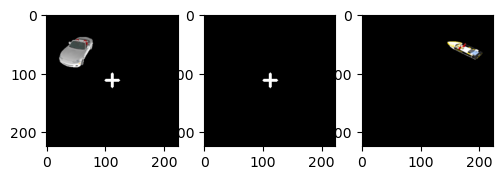

In [15]:
# display trial frame sequence
images = []
for img_path in sorted(glob.glob('../datasets/test_mini/trial0/*.png')):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 10
for i, image in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.imshow(image)
with open('../datasets/test_mini/trial0/trial_info') as f:
    trial_info = json.load(f)
print('instruction ', trial_info['instruction'])
print('answers: ', trial_info['answers'])